# Whisper-LM Paper Results

The sections with numeric prefix refer to their respective sections in the paper.

In [ ]:
"""Whisper-LM Paper Results."""

## Nootebook Setup

### Python Requirements

- [`plotly`](https://plotly.com/python/): Plotting library.
- [`bokeh`](https://docs.bokeh.org/en/latest/): Color palette.
- [`numpy`](https://numpy.org/doc/): Simple calculations.
- [`pandas`](https://pandas.pydata.org/docs/): Table management.
- [`tqdm`](https://tqdm.github.io/): Progress bars.
- [`scipy`](https://docs.scipy.org/doc/scipy/): Statistical significance analysis.

If you want to install them, convert the following cell to code (with `[y]`), and run it:

Import all the required libraries:

In [ ]:
import json
import os
import re
from collections import defaultdict
from pathlib import Path

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from bokeh.palettes import Colorblind
from IPython.display import display
from scipy.stats import wilcoxon
from tqdm.auto import tqdm

### Style Tests

This notebook has been tested to pass multiple style tests using the [`nbqa`](https://pypi.org/project/nbqa/) Python package:

* [x] [`black --check`](https://pypi.org/project/black/): the uncompromising code formatter.
* [x] [`isort`](https://timothycrosley.github.io/isort/): sort your imports, so you don't have to.
* [x] [`pyupgrade`](https://github.com/asottile/pyupgrade): automatically upgrade syntax for newer versions of the language.
* [x] [`blacken-docs`](https://github.com/asottile/blacken-docs): run [Black](https://pypi.org/project/black/) on Python code blocks in documentation files.
* [x] [`pylint`](https://pypi.org/project/pylint/): a [static code analyser](https://en.wikipedia.org/wiki/Static_code_analysis) for Python 2 or 3.
* [x] [`pydocstyle --convention=numpy`](https://www.pydocstyle.org/en/stable/): static analysis tool for checking compliance with Python docstring conventions.
* [x] [`flake8`](https://flake8.pycqa.org/en/latest/): a wrapper around these tools: PyFlakes, pycodestyle, Ned Batchelder’s McCabe script.

For example:

```shell
$ nbqa pylint "Whisper Paper Results.ipynb"
```

Please, try to keep code changes to the notebook reasonably clean.

### Plotting Library Color Theme

We will use Plotly-Python library for the plots: https://plotly.com/python/

We will use a clear theme: https://plotly.com/python/templates/

In [ ]:
pio.templates.default = "none"

With **colorblind** colors from Bokeh library: https://docs.bokeh.org/en/latest/docs/reference/palettes.html

In [ ]:
plotly_colors = Colorblind[8]
pio.templates[pio.templates.default].layout.colorway = plotly_colors

### Plotly Scale Config to Use

This allows the plots to show better resolution when saved as images.

Usage example:
```python
fig.show(config=plotly_config)
```

In [ ]:
plotly_config = {"toImageButtonOptions": {"scale": 2}}

### Paper Style Font

In [ ]:
font_size = 24
font_family = "Nimbus Roman"
font_color = "black"

### Sorting Languages, Dataset, Sizes and Methods

We define custom order for languages, datasets and model sizes:

In [ ]:
LANGUAGE_ORDER = ["eu", "gl", "ca", "es"]
LANGUAGE_LONG_ORDER = ["Basque", "Galician", "Catalan", "Spanish"]
DATASET_ORDER = ["CV13", "AhoMyTTS", "SLR", "Fleurs", "MLS"]
MODEL_SIZE_ORDER = ["Tiny", "Base", "Small", "Medium", "Large", "Large-V2", "Large-V3"]
METHOD_ORDER = ["FT", "FT+LM", "FT+LLM"]

### Setup Result File Paths

Set the path to the log files with the results here:

In [ ]:
# In my case, they are in /home/$USER/whisper-lm/logs
HOME = Path.home()
LOGS_DIR = os.path.join(HOME, "whisper-lm", "logs", "whisper")

Here we put the dataset paths, the datasets evaluated, and the model list:

In [ ]:
# Dataset relative paths in the logs
CV13 = "mozilla-foundation/common_voice_13_0/test"
FLEURS = "google/fleurs/train validation test"
SLR = "openslr/train"
AHOMYTTS = "banco_voces_corpus/train"
MLS = "facebook/multilingual_librispeech/test"

# List of all the datasets tested
datasets = {
    "eu": {
        "CV13": CV13,
        "AhoMyTTS": AHOMYTTS,
        "SLR": SLR,
    },
    "gl": {
        "CV13": CV13,
        "Fleurs": FLEURS,
        "SLR": SLR,
    },
    "ca": {
        "CV13": CV13,
        "Fleurs": FLEURS,
        "SLR": SLR,
    },
    "es": {
        "CV13": CV13,
        "Fleurs": FLEURS,
        "MLS": MLS,
    },
}

# List of models with relative path in logs
models = {
    "vanilla": {
        "Tiny": "openai/whisper-tiny",
        "Base": "openai/whisper-base",
        "Small": "openai/whisper-small",
        "Medium": "openai/whisper-medium",
        "Large": "openai/whisper-large",
        "Large-V2": "openai/whisper-large-v2",
        "Large-V3": "openai/whisper-large-v3",
    },
    "nolm": {
        "Tiny": "zuazo/whisper-tiny",
        "Base": "zuazo/whisper-base",
        "Small": "zuazo/whisper-small",
        "Medium": "zuazo/whisper-medium",
        "Large": "zuazo/whisper-large",
        "Large-V2": "zuazo/whisper-large-v2",
        "Large-V3": "zuazo/whisper-large-v3",
    },
    "lm": {
        "Tiny": "zuazo/whisper-tiny",
        "Base": "zuazo/whisper-base",
        "Small": "zuazo/whisper-small",
        "Medium": "zuazo/whisper-medium",
        "Large": "zuazo/whisper-large",
        "Large-V2": "zuazo/whisper-large-v2",
        "Large-V3": "zuazo/whisper-large-v3",
    },
    "llm": {
        "Tiny": "zuazo/whisper-tiny",
        "Base": "zuazo/whisper-base",
        "Small": "zuazo/whisper-small",
        "Medium": "zuazo/whisper-medium",
        "Large": "zuazo/whisper-large",
        "Large-V2": "zuazo/whisper-large-v2",
        "Large-V3": "zuazo/whisper-large-v3",
    },
}

# Vanilla+LM in Spanish
models["vanilla+lm"] = models["vanilla"]

## 4.1.1 Audio Datasets

### Pretrain Dataset from the Whisper Paper

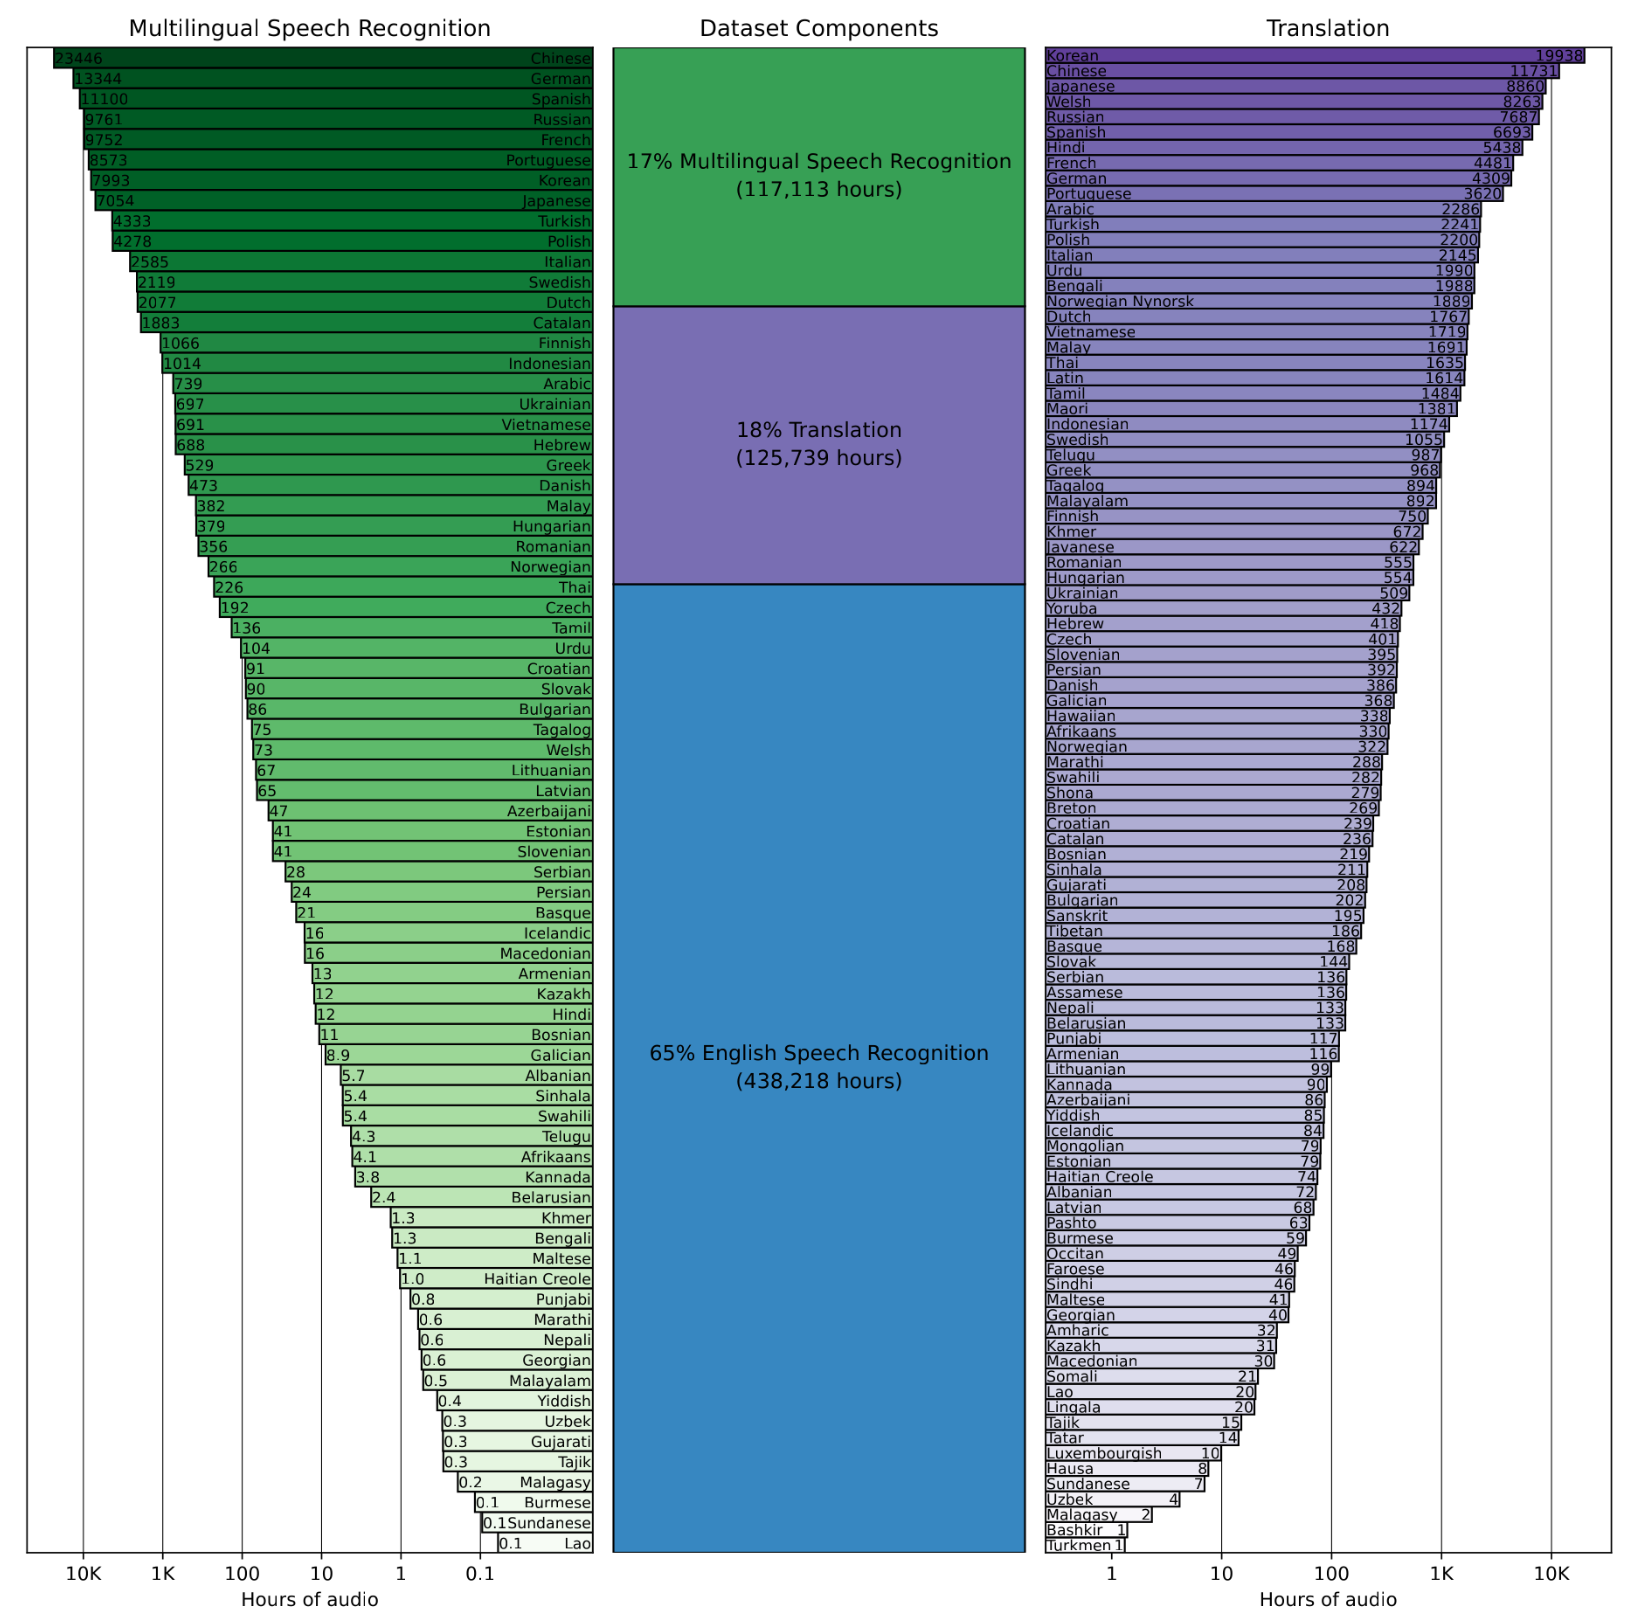

### Table 2: Details of the datasets used for fine-tuning (top) and evaluation (bottom).

| Dataset                        | Language | Split            | Examples  | Hours   |
|--------------------------------|----------|------------------|-----------|---------|
| Common Voice 13                | Basque   | train+validation | 17,509    | 25.9    |
| Common Voice 13                | Galician | train+validation | 17,348    | 23.1    |
| Common Voice 13                | Catalan  | train+validation | 1,063,345 | 1,643.1 |
| Common Voice 13                | Spanish  | train+validation | 296,037   | 434.8   |
| Common Voice 13                | Basque   | test             | 6,591     | 10.5    |
| AhoMyTTS                       | Basque   | -                | 590       | 0.8     |
| OpenSLR-76                     | Basque   | -                | 7,136     | 13.9    |
| Common Voice 13                | Galician | test             | 6,546     | 9.4     |
| FLEURS                         | Galician | all              | 3,497     | 10.3    |
| OpenSLR-77                     | Galician | -                | 5,587     | 10.3    |
| Common Voice 13                | Catalan  | test             | 16,380    | 28.1    |
| FLEURS                         | Catalan  | all              | 3,644     | 11.9    |
| OpenSLR-69                     | Catalan  | -                | 4,240     | 9.4     |
| Common Voice 13                | Spanish  | test             | 15,708    | 26.8    |
| FLEURS                         | Spanish  | all              | 4,112     | 13.3    |
| Multilingual LibriSpeech (MLS) | Spanish  | test             | 2,385     | 10.0    |

### Figure 1: Distribution of dataset hours

We put this information in a Python `dict` to plot it:

In [ ]:
data_hours = {
    "Step": ["Pre-Train", "Fine-Tune", "Evaluation"],
    "Basque (eu)": [21, 25.9, 10.5 + 0.8 + 13.9],
    "Galician (gl)": [8.9, 23.1, 9.4 + 10.3 + 10.3],
    "Catalan (ca)": [1883, 1643.1, 28.1 + 11.9 + 9.4],
    "Spanish (es)": [11100, 434.8, 26.8 + 13.3 + 10.0],
}

We create the final plot with the dataset hours:

In [ ]:
# Manually sorted languages and their short forms
phases = data_hours["Step"]
# Create a dict with `"Basque (eu)": "eu"` list of key/values
short_forms = {
    f"{ll} ({ls})": ls for ls, ll in zip(LANGUAGE_ORDER, LANGUAGE_LONG_ORDER)
}
languages = list(short_forms.keys())
threshold = 22  # Threshold for when to use short forms

# Creating a pie chart for each phase
fig = go.Figure()

for i, phase in enumerate(phases):
    # Fetch values in the specified order
    values = [data_hours[lang][i] for lang in languages]
    if phase.lower() == "pre-train":
        custom_labels = [
            f"{short_forms[lang]}:{v:.0f}h" if v < threshold else f"{v:,.0f}h"
            for lang, v in zip(languages, values)
        ]
    else:
        custom_labels = [
            f"{v:.0f}h" if v < threshold else f"{v:,.0f}h"
            for lang, v in zip(languages, values)
        ]
    fig.add_trace(
        go.Pie(
            labels=languages,
            values=values,
            domain={
                "x": [i / 3, (i + 1) / 3 - 0.05],
                "y": [0.1, 1],
            },  # Adjust domain to move title up
            hoverinfo="label+value+percent",
            textinfo="label+value",
            # Use custom labels depending on the value
            texttemplate=custom_labels,
            marker=dict(line=dict(color="black", width=1)),
            # Hide the name from the hover tooltips
            hoverlabel=dict(namelength=0),
            sort=False,  # Disable sorting of pie slices
            hole=0.4,  # Makes it a donut chart
        )
    )

fig.update_layout(
    title="Distribution of ASR Model Training Hours by Phase and Language",
    annotations=[
        dict(text=phase, x=center, y=1.15, font_size=24, showarrow=False)
        for phase, center in zip(phases, [0.08, 0.47, 0.875])
    ],
    showlegend=True,
    # Adjusted legend configuration without title
    legend=dict(orientation="h", yanchor="bottom", y=0, xanchor="center", x=0.5),
)
fig.update_layout(width=900, height=450)
None
# fig.show(config=plotly_config)

Here we format the plot for the paper and save it as a PDF to later include it with LaTeX:

In [ ]:
fig.update_layout(
    margin=dict(l=70, r=70, t=70, b=70),
    title=None,
    font_size=font_size,
    font_family=font_family,
    font_color=font_color,
)
# Increase titles font size
fig.update_layout(
    annotations=[
        dict(
            text=phase, x=center, y=1.15, font_size=30, showarrow=False
        )  # Increase font size here
        for phase, center in zip(phases, [0.07, 0.47, 0.89])
    ]
)
fig.write_image("whisper_data_pie.pdf", format="pdf")
fig.write_image("whisper_data_pie.png", format="png", scale=2)
fig.show()

## A.1 Vanilla, Fine-Tuned, and Language Model WER Scores

We create a helper function to properly sort the tables by columns:

In [ ]:
def apply_custom_sort(
    df, language_order=LANGUAGE_LONG_ORDER, dataset_order=DATASET_ORDER
):
    """Sorts a DataFrame based by "Language" and "Dataset" columns.

    Parameters
    ----------
    df : DataFrame
        DataFrame to be sorted.
    language_order : list, optional
        The custom order for the "Language" column.
    dataset_order : list, optional
        The custom order for the "Dataset" column.

    Returns
    -------
    DataFrame
        DataFrame sorted according to the specified "Language" and
        "Dataset" order.
    """
    if "Language" in df.columns and "Dataset" in df.columns:
        df["Language"] = pd.Categorical(
            df["Language"], categories=language_order, ordered=True
        )
        df["Dataset"] = pd.Categorical(
            df["Dataset"], categories=dataset_order, ordered=True
        )
        df = df.sort_values(["Language", "Dataset"])
    elif "Dataset" in df.columns:
        df["Dataset"] = pd.Categorical(
            df["Dataset"], categories=dataset_order, ordered=True
        )
        df = df.sort_values("Dataset")

    return df

We create the WER tables that will be displayed in the **Appendix A.1 Vanilla, Fine-Tuned, and Language Model WER Scores**:

In [ ]:
def read_wer_json(path):
    """Read the WER from a JSON file with dataset-level scores.

    Parameters
    ----------
    path : str
        The JSON file path.

    Returns
    -------
    float
        The WER value.
    """
    with open(path) as file:
        data = json.load(file)
    return data["wer"]


def create_wer_table(model_type, logs_dir=LOGS_DIR, sub_dir=None):
    """Create WER tables reading scores from disk.

    It reads the dataset-level WER scores for each dataset, and model size
    and creates the data frame with the results for a specific method: Vanilla,
    Fine-Tuning, FT+LM or FT+LLM.

    Parameters
    ----------
    model_type : str
        The type of model/method to read: "vanilla", "ft", "lm", "llm".
    logs_dir : str, optional
        Main log directory path.
    sub_dir : str, optional
        Sub-directory path for some cases. Used in the ablation study.

    Returns
    -------
    pandas.DataFrame
        The table with the WER values with the language/datasets as rows and
        the model sizes as columns. The first two columns are "Language" and
        "Dataset", then the model sizes.

    Example
    -------
    ```python
    create_wer_table("vanilla")
    ```
    """
    rows = []
    for lang, data_paths in datasets.items():
        for dataset_name, dataset_path in data_paths.items():
            row = {"Language": lang, "Dataset": dataset_name}
            for model_size, model_name in models[model_type].items():
                model_path = (
                    model_name if "vanilla" in model_type else f"{model_name}-{lang}"
                )
                wer_path = os.path.join(
                    logs_dir,
                    lang,
                    model_type,
                    dataset_path,
                    model_path,
                )
                if not os.path.exists(wer_path):
                    continue
                if sub_dir is not None:
                    wer_path = os.path.join(wer_path, sub_dir)
                row[model_size] = read_wer_json(
                    os.path.join(wer_path, "dataset_level_results.json")
                )
            # Append row if it has some data results
            if len(row) > 2:  # more info than Language & Dataset
                rows.append(row)
    return pd.DataFrame(rows)


def display_pretty_table(df, title, ndigits=2, scale=100):
    """Display a table following the paper format.

    Display a DataFrame in a visually appealing format with values presented as
    percentages.

    This function modifies the numeric columns by converting the WER values to
    a percentage format, multiplying by a specified scale and rounding to a
    given number of decimal places for display purposes. Negative values are
    displayed in red font.

    Parameters
    ----------
    df : DataFrame
        The DataFrame containing the data to be displayed. Expected to have
        columns for WER that are numeric.
    title : str
        The caption to be set for the displayed table.
    ndigits : int, optional
        The number of decimals to show. Default is 2.
    scale : float, optional
        The number to multiply all the scores by. Default is 100.

    Notes
    -----
    The function directly displays the table in the notebook environment using
    IPython's display capabilities and does not return any value. It makes a
    copy of the input DataFrame to ensure that the original data is not
    modified.
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    pretty_df = df.copy().dropna()

    # Set index if not already set, assuming "Language" and "Dataset"
    # need to be index
    if "Language" in df.columns and "Dataset" in df.columns:
        pretty_df.set_index(["Language", "Dataset"], inplace=True)

    # Function to apply color to negative numbers
    def color_negative_red(value):
        """Colors negatives red, otherwise black.

        Parameters
        ----------
        value : float
            The value to color.

        Return
        ------
        str
            The "color: black" or "color: red" as `str`.
        """
        color = "red" if value < 0 else "black"
        return f"color: {color}"

    # Multiply all numeric results by scale and round to ndigits decimal places
    for column in pretty_df.columns:
        if pd.api.types.is_numeric_dtype(pretty_df[column]):
            pretty_df[column] = (pretty_df[column] * scale).round(ndigits)

    # Display the DataFrame using a more visually appealing style
    display(
        pretty_df.style.applymap(color_negative_red)
        .format("{:." + str(ndigits) + "f}")
        .set_caption(title)
        .set_table_styles(
            [
                {
                    "selector": "caption",
                    "props": [("color", "black"), ("font-size", "16px")],
                }
            ]
        )
    )

We convert the languages to use long-form:

In [ ]:
def convert_language_codes(df):
    """Convert languages to long-form.

    Convert language codes in a DataFrame to their corresponding
    full language names.

    Parameters
    ----------
    df : DataFrame
        DataFrame containing a "Language" column with language codes.

    Returns
    -------
    DataFrame
        The DataFrame with language codes converted to full names.
    """
    # Mapping of language codes to full language names
    language_map = {"eu": "Basque", "gl": "Galician", "ca": "Catalan", "es": "Spanish"}

    # Replace the "Language" column using the map
    df["Language"] = df["Language"].map(language_map)

    return df

In [ ]:
# Create WER tables for vanilla and fine-tuned models
vanilla_wer_table = create_wer_table("vanilla")
ft_wer_table = create_wer_table("nolm")
lm_wer_table = create_wer_table("lm")
llm_wer_table = create_wer_table("llm")

# Convert languages to long-form format
vanilla_wer_table = convert_language_codes(vanilla_wer_table)
ft_wer_table = convert_language_codes(ft_wer_table)
lm_wer_table = convert_language_codes(lm_wer_table)
llm_wer_table = convert_language_codes(llm_wer_table)

In [ ]:
title = "Word Error Rate (WER) (%)"

# Display the tables
desc = f"{title}: Vanilla"
display_pretty_table(vanilla_wer_table, title=desc)
desc = f"{title}: Fine-tuned"
display_pretty_table(ft_wer_table, title=desc)
desc = f"{title}: FT+LM"
display_pretty_table(lm_wer_table, title=desc)
desc = f"{title}: FT+LLM"
display_pretty_table(llm_wer_table, title=desc)

#### LaTeX Format

In [ ]:
def display_latex_table(df, title="table1", ndigits=2, scale=100):
    """Convert a Pandas table to LaTeX format for the paper.

    Convert a DataFrame to a LaTeX formatted table, multiplying values by a
    specified scale and formatting negative values in red.

    Parameters
    ----------
    df : DataFrame
        The DataFrame containing the data to be displayed.
    title : str, optional
        LaTeX label for the table.
    ndigits : int, optional
        Number of decimal places to round to.
    scale : float, optional
        Factor to scale the data values by (default is 100 to convert to
        percentages).

    Returns
    -------
    str
        A string containing the LaTeX table code.
    """
    # Scale and round the DataFrame
    df = df.copy()
    numeric_cols = df.select_dtypes(include=["number"]).columns
    for col in numeric_cols:
        df[col] = (df[col] * scale).round(ndigits)

    # Convert numeric values to strings, applying color formatting to
    # negative values
    def format_value(val):
        if val < 0:
            return f"\\textcolor{{red}}{{{val:.{ndigits}f}}}"
        else:
            return f"{val:.{ndigits}f}"

    for col in numeric_cols:
        df[col] = df[col].apply(format_value)

    # Convert the DataFrame to LaTeX
    latex_str = df.to_latex(index=False, escape=False)

    # Add custom formatting for the LaTeX table
    latex_table = f"""
\\begin{{table}}[H]
\\centering
\\label{{tab:{title}}}
{latex_str}
\\end{{table}}
    """
    print(latex_table)

## 5.1.1 - 5.1.3 Performance Improvements

### Dataset-Level WER Wilcoxon Tests

In [ ]:
def significance_test(vanilla_scores, new_scores):
    """Statistical significance using Wilcoxon signed-rank test.

    Perform a Wilcoxon signed-rank test to compare two sets of WER scores,
    accommodating tables indexed by both "Dataset" and "Language".

    Parameters
    ----------
    vanilla_scores : DataFrame
        A DataFrame containing the WER scores from the vanilla model,
        indexed by "Dataset" and "Language".
    new_scores : DataFrame
        A DataFrame containing the WER scores from a new or modified model,
        similarly indexed.

    Returns
    -------
    tuple
        A tuple containing the Wilcoxon statistic and the p-value,
        indicating the result of the statistical test.
    """
    # Ensure DataFrames include "Language" and "Dataset" as id variables
    # if the table has both columns separated
    if "Language" in vanilla_scores.columns:
        id_vars = ["Dataset", "Language"]
    else:
        id_vars = ["Dataset"]
    vanilla_flat = vanilla_scores.melt(
        id_vars=id_vars, var_name="Model", value_name="Vanilla_WER"
    )
    new_flat = new_scores.melt(id_vars=id_vars, var_name="Model", value_name="New_WER")

    # Merge the data on "Dataset", "Language", and "Model"
    merged_data = pd.merge(vanilla_flat, new_flat, on=id_vars + ["Model"])

    # Apply the Wilcoxon test for paired samples
    stats, p_value = wilcoxon(merged_data["Vanilla_WER"], merged_data["New_WER"])

    return stats, p_value

In [ ]:
# Fine-Tuning significance
stats, p_value = significance_test(vanilla_wer_table, ft_wer_table)
print(f"FT: W={stats}, p={p_value}")

# FT+LM and FT+LLM significance
whisper_scores = {
    "FT+LM": lm_wer_table,
    "FT+LLM": llm_wer_table,
}
for name, scores in whisper_scores.items():
    stats, p_value = significance_test(ft_wer_table, scores)
    print(f"{name}: W={stats}, p={p_value}")

### Sentence-Level WER Wilcoxon Tests

In [ ]:
def read_sentence_wers_json(path):
    """Read JSON file containing sentence-level WER data.

    Parameters
    ----------
    path : str
        Path to the JSON file.

    Returns
    -------
    list
        A list of WER values extracted from the JSON file.
    """
    with open(path) as file:
        data = json.load(file)
    return [r["wer"] for r in data]


def create_sentence_wers_list(model_type):
    """Read sentence-level WER results.

    Create a list of dictionaries representing sentence-level
    WER results for various datasets and model sizes.

    Parameters
    ----------
    model_type : str
        The type of the model which could be "vanilla", "nolm",
        "lm", or "llm".

    Returns
    -------
    list
        A list of dictionaries, each containing language, dataset,
        and WER results for various model sizes.
    """
    rows = []
    for lang, data_paths in datasets.items():
        for dataset_name, dataset_path in data_paths.items():
            row = {"Language": lang, "Dataset": dataset_name}
            for model_size, model_name in models[model_type].items():
                model_path = (
                    model_name if model_type == "vanilla" else f"{model_name}-{lang}"
                )
                wer_path = os.path.join(
                    LOGS_DIR,
                    lang,
                    model_type,
                    dataset_path,
                    model_path,
                    "sentence_level_results.json",
                )
                row[model_size] = read_sentence_wers_json(wer_path)
            rows.append(row)
    return rows

In [ ]:
def perform_wilcoxon_for_all(models_vanilla, models_ft):
    """Statistical significance for each model size and dataset.

    Perform the Wilcoxon signed-rank test across all corresponding
    entries of two lists of models.

    Parameters
    ----------
    models_vanilla : list of dicts
        List of dictionaries containing WER results for the vanilla
        model.
    models_ft : list of dicts
        List of dictionaries containing WER results for the fine-tuned
        model.

    Returns
    -------
    DataFrame
        A DataFrame with the results of the Wilcoxon tests for each model
        size and dataset, including p-values and test statistics.
    """
    results = []
    for vanilla, ft in zip(models_vanilla, models_ft):
        assert vanilla["Language"] == ft["Language"]
        assert vanilla["Dataset"] == ft["Dataset"]
        for key in vanilla.keys():
            if key in ["Language", "Dataset"]:
                continue
            # Perform Wilcoxon test
            w, p = wilcoxon(vanilla[key], ft[key])
            results.append(
                {
                    "Language": vanilla["Language"],
                    "Dataset": vanilla["Dataset"],
                    "Model Size": key,
                    "Wilcoxon Statistic": w,
                    "p-Value": p,
                }
            )
    return pd.DataFrame(results)

In [ ]:
# Load sentence-level WERs for vanilla and fine-tuned models
models_vanilla = create_sentence_wers_list("vanilla")
models_ft = create_sentence_wers_list("nolm")
models_lm = create_sentence_wers_list("lm")
models_llm = create_sentence_wers_list("llm")

# Perform Wilcoxon tests
test_results_ft = perform_wilcoxon_for_all(models_vanilla, models_ft)
test_results_lm = perform_wilcoxon_for_all(models_ft, models_lm)
test_results_llm = perform_wilcoxon_for_all(models_ft, models_llm)

#### Fine-Tuning

In [ ]:
# Apply the custom ordering to the "Language", "Dataset"
# and "Model Size" columns
test_results_ft["Language"] = pd.Categorical(
    test_results_ft["Language"], categories=LANGUAGE_ORDER, ordered=True
)
test_results_ft["Dataset"] = pd.Categorical(
    test_results_ft["Dataset"], categories=DATASET_ORDER, ordered=True
)
test_results_ft["Model Size"] = pd.Categorical(
    test_results_ft["Model Size"], categories=MODEL_SIZE_ORDER, ordered=True
)

# Recreate the pivot tables with the new order
p_values_pivot = test_results_ft.pivot_table(
    index=["Language", "Dataset"],
    columns="Model Size",
    values="p-Value",
    aggfunc="first",
)
w_stats_pivot = test_results_ft.pivot_table(
    index=["Language", "Dataset"],
    columns="Model Size",
    values="Wilcoxon Statistic",
    aggfunc="first",
)

# Display the pivot tables
print("P-Values Pivot Table for Fine-Tuning:")
display(p_values_pivot)

print("Wilcoxon Statistics Pivot Table for Fine-Tuning:")
display(w_stats_pivot)

In [ ]:
def significance_notation(p):
    """Convert significance values to asterisks.

    Return a string notation based on the significance level of a
    p-value.

    Parameters
    ----------
    p : float
        The p-value from a statistical test.

    Returns
    -------
    str
        A string notation for the statistical significance ("***",
        "**", "*", or "") based on conventional significance levels.
    """
    if p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    else:
        return ""


# Create a new DataFrame for significance notation based on p-values
significance_table = p_values_pivot.applymap(significance_notation)

# Display the significance table
print("Significance Levels Table for Fine-Tuning:")
display(significance_table)

#### FT+LM

In [ ]:
test_results_lm["Language"] = pd.Categorical(
    test_results_lm["Language"], categories=LANGUAGE_ORDER, ordered=True
)
test_results_lm["Dataset"] = pd.Categorical(
    test_results_lm["Dataset"], categories=DATASET_ORDER, ordered=True
)
test_results_lm["Model Size"] = pd.Categorical(
    test_results_lm["Model Size"], categories=MODEL_SIZE_ORDER, ordered=True
)

# Recreate the pivot tables with the new order
p_values_pivot = test_results_lm.pivot_table(
    index=["Language", "Dataset"],
    columns="Model Size",
    values="p-Value",
    aggfunc="first",
)
w_stats_pivot = test_results_lm.pivot_table(
    index=["Language", "Dataset"],
    columns="Model Size",
    values="Wilcoxon Statistic",
    aggfunc="first",
)

# Display the pivot tables
print("P-Values Pivot Table for FT+LM:")
display(p_values_pivot)

print("Wilcoxon Statistics Pivot Table for FT+LL=M:")
display(w_stats_pivot)

# Create a new DataFrame for significance notation based on p-values
significance_table = p_values_pivot.applymap(significance_notation)

# Display the significance table
print("Significance Levels Table for FT+LM:")
display(significance_table)

#### FT+LLM

In [ ]:
test_results_llm["Language"] = pd.Categorical(
    test_results_llm["Language"], categories=LANGUAGE_ORDER, ordered=True
)
test_results_llm["Dataset"] = pd.Categorical(
    test_results_llm["Dataset"], categories=DATASET_ORDER, ordered=True
)
test_results_llm["Model Size"] = pd.Categorical(
    test_results_llm["Model Size"], categories=MODEL_SIZE_ORDER, ordered=True
)

# Recreate the pivot tables with the new order
p_values_pivot = test_results_llm.pivot_table(
    index=["Language", "Dataset"],
    columns="Model Size",
    values="p-Value",
    aggfunc="first",
)
w_stats_pivot = test_results_llm.pivot_table(
    index=["Language", "Dataset"],
    columns="Model Size",
    values="Wilcoxon Statistic",
    aggfunc="first",
)

# Display the pivot tables
print("P-Values Pivot Table for FT+LLM:")
display(p_values_pivot)

print("Wilcoxon Statistics Pivot Table for FT+LLM:")
display(w_stats_pivot)

# Create a new DataFrame for significance notation based on p-values
significance_table = p_values_pivot.applymap(significance_notation)

# Display the significance table
print("Significance Levels Table for FT+LLM:")
display(significance_table)

### Relative Error Reduction (RER) Results

$$
\begin{equation}
\label{eq:rer}
    RER = \left(1 - \frac{WER_{\text{with intervention}}}{WER_{\text{baseline}}}\right) \times 100\%
\end{equation}
$$


In [ ]:
def calculate_rer(df_baseline, df_intervention):
    """Calculate the RER values.

    Calculate the Relative Error Reduction (RER) between baseline
    and intervention datasets.

    Parameters
    ----------
    df_baseline : DataFrame
        DataFrame with baseline Word Error Rates (WERs) indexed by
        "Dataset".
    df_intervention : DataFrame
        DataFrame with intervention WERs, indexed by "Dataset".

    Returns
    -------
    DataFrame
        DataFrame containing the RER values.
    """
    # Ensure that the datasets are aligned by "Dataset"
    df_baseline = apply_custom_sort(df_baseline).set_index(["Language", "Dataset"])
    df_intervention = apply_custom_sort(df_intervention).set_index(
        ["Language", "Dataset"]
    )

    # Calculate RER
    rer = (1 - df_intervention.divide(df_baseline)) * 100

    # Reset index to bring "Dataset" back to a column
    rer = rer.reset_index()
    return rer

In [ ]:
# Calculate RER for each comparison
rer_ft = calculate_rer(vanilla_wer_table, ft_wer_table)
rer_lm = calculate_rer(ft_wer_table, lm_wer_table)
rer_llm = calculate_rer(ft_wer_table, llm_wer_table)

In [ ]:
title = "Relative Error Reduction (RER) (%)"

desc = f"{title}: FT"
display_pretty_table(rer_ft, title=desc, ndigits=0, scale=1)
desc = f"{title}: LM"
display_pretty_table(rer_lm, title=desc, ndigits=0, scale=1)
desc = f"{title}: LLM"
display_pretty_table(rer_llm, title=desc, ndigits=0, scale=1)

#### LaTeX Format

## A.2 Language Model Integration for Vanilla Spanish Models

In [ ]:
title = "Word Error Rate (WER) (%)"

vanilla_lm_wer_table = create_wer_table("vanilla+lm")

# Convert languages to long-form format
vanilla_lm_wer_table = convert_language_codes(vanilla_lm_wer_table)

desc = f"{title}: Vanilla+LM"
display_pretty_table(vanilla_lm_wer_table, title=desc)

In [ ]:
title = "Relative Error Reduction (RER) (%)"

rer_vanilla_lm = calculate_rer(vanilla_wer_table, vanilla_lm_wer_table)
desc = f"{title}: Vanilla+LM"
display_pretty_table(rer_vanilla_lm, title=desc, ndigits=0, scale=1)

## 5.1.4 Comparison of Method Robustness

### Effective Robustness

From the Whisper paper in https://arxiv.org/abs/2212.04356:

---

To quantify this difference, we examine both *overall* robustness, that is average performance across many distributions/datasets, and *effective* robustness, introduced by [Taori et al. (2020)](https://arxiv.org/abs/2007.00644), which measures the difference in expected performance between a reference dataset, which is usually in-distribution, and one or more out-of-distribution datasets. A model with high effective robustness does better than expected on out-of-distribution datasets as a function of its performance on the reference dataset and approaches the ideal of equal performance on all datasets. For our analysis, we use LibriSpeech as the reference dataset due to its central role in modern speech recognition research and the availability of many released models trained on it, which allows for characterizing robustness behaviors. We use a suite of 12 other academic speech recognition datasets to study out-of-distribution behaviors. Full details about these datasets can be found in Appendix.

---

Explained better in Taori's paper at https://arxiv.org/abs/2007.00644:

---
**Effective robustness.** The core issue in the preceding example is that standard accuracy (acca) acts as a confounder.
Instead of directly comparing accuracies under distribution shift, we would like to understand if a model $f_b$ offers higher accuracy on the shifted test set \emph{beyond what is expected from having higher accuracy on the original test set}.
We call this notion of robustness beyond a baseline *effective robustness*.
Graphically, effective robustness corresponds to a model being above the linear trend (red line) given by our testbed of standard models in Figure 1 (left).

To precisely define effective robustness, we introduce $\xi(x)$, the baseline accuracy on the shifted test set for a given accuracy $x$ on the standard test set.
On the distribution shifts in our testbed, we instantiate $\xi$ by computing the parameters of a log-linear fit for the models without a robustness intervention (the red line in Figure 1).
Empirically, this approach yields a good fit to the data.
For other distribution shifts, the baseline accuracy may follow different trends and may also depend on properties beyond the standard accuracy, e.g., model architecture.
Appendix I.1 contains detailed information on how to compute $\xi$.

Given the accuracy baseline $\xi$, we define the effective robustness of a model as

$
\rho(f) = acc_2(f) - \xi(acc_1(f)) \; .
$

A model without special robustness properties falls on the linear fit and hence has $\rho(f)$ = 0.
The main goal of a robustness intervention is to increase $\rho$.
Models with large $\rho$ offer robustness beyond what we can currently achieve with standard models.

---

In [ ]:
def calculate_effective_robustness(data):
    """Calculate the ERER (robustness) results.

    Calculate the Effective Robustness (ERER) across languages for model
    performances on in-distribution (ID) and out-of-distribution (OOD)
    datasets.

    Parameters
    ----------
    data : dict or DataFrame
        Data containing WERs for various models and datasets.

    Returns
    -------
    DataFrame
        A DataFrame containing the ERER calculated as the difference in
        mean WERs between OOD and ID datasets, grouped by model size and
        language.
    """
    df = pd.DataFrame(data)
    if "Language" not in df.columns:
        df["Language"] = df["Dataset"].str.split(" - ").str[0]
    df_id = df[df["Dataset"].str.contains("CV13")]
    df_ood = df[~df["Dataset"].str.contains("CV13")]

    results = []
    # Exclude "Dataset" and "Language" columns
    model_sizes = df.columns.to_list()[2:]

    for size in model_sizes:
        for lang in df["Language"].unique():
            id_values = df_id[df_id["Language"] == lang][size].dropna()
            ood_values = df_ood[df_ood["Language"] == lang][size].dropna()

            if id_values.empty or ood_values.empty:
                results.append(
                    {
                        "Model Size": size,
                        "Language": lang,
                        "ERER": "Data Unavailable",
                    }
                )
                continue

            # Compute ERER
            erer = np.mean(ood_values) - np.mean(id_values)
            results.append(
                {
                    "Model Size": size,
                    "Language": lang,
                    "ERER": erer,
                }
            )

    # Convert results to DataFrame
    return pd.DataFrame(results)

In [ ]:
def aggregate_erer_across_methods_and_sizes(data_ft, data_lm, data_llm):
    """Aggregate ERER across different methods and model sizes.

    Parameters
    ----------
    data_ft : dict or DataFrame
        Data for the fine-tuned (FT) method.
    data_lm : dict or DataFrame
        Data for the fine-tuned plus language model (FT+LM) method.
    data_llm : dict or DataFrame
        Data for the fine-tuned plus large language model (FT+LLM) method.

    Returns
    -------
    DataFrame
        A DataFrame summarizing the mean and standard deviation of ERER,
        grouped by model size and method.
    """
    # Calculate ERER for each method and append method as a new column
    df_ft = calculate_effective_robustness(data_ft)
    df_ft["Method"] = "FT"
    df_lm = calculate_effective_robustness(data_lm)
    df_lm["Method"] = "FT+LM"
    df_llm = calculate_effective_robustness(data_llm)
    df_llm["Method"] = "FT+LLM"

    # Combine all data into a single DataFrame
    df_combined = pd.concat([df_ft, df_lm, df_llm], axis=0)

    # Define method order and convert "Method" to categorical type
    df_combined["Method"] = pd.Categorical(
        df_combined["Method"], categories=METHOD_ORDER, ordered=True
    )

    # Group by Model Size and Method, then calculate the mean and
    # standard deviation of ERER
    df_grouped = (
        df_combined.groupby(["Model Size", "Method"])
        .agg(ERER_mean=("ERER", "mean"), ERER_std=("ERER", "std"))
        .reset_index()
    )

    return df_grouped

In [ ]:
df_erer_grouped = aggregate_erer_across_methods_and_sizes(rer_ft, rer_lm, rer_llm)

### Figure 2: Effective robustness of RER by model size

In [ ]:
# Create the plot with error bars
fig = go.Figure()
for i, method in enumerate(["FT", "FT+LM", "FT+LLM"]):
    df_method = df_erer_grouped[df_erer_grouped["Method"] == method]
    fig.add_trace(
        go.Bar(
            x=df_method["Model Size"],
            y=df_method["ERER_mean"],
            error_y=dict(
                type="data",  # Use actual data values for error bars
                array=df_method["ERER_std"],  # Standard deviations
                visible=True,
            ),
            name=method,
            # Ensure you have defined plotly_colors array appropriately
            marker_color=plotly_colors[i + 4],
            marker=dict(line=dict(color="black", width=1)),
        )
    )

fig.update_layout(
    title=(
        "Average Effective Robustness of Relative Error Reduction (ERER)"
        " by Model Size and Method"
    ),
    xaxis_title="Model Size",
    yaxis_title="Robustness (ERER)",
    xaxis=dict(
        categoryorder="array",  # Set the order to a custom array
        categoryarray=MODEL_SIZE_ORDER,  # Custom order array
    ),
    barmode="group",
    legend_title="Method",
)

fig.update_xaxes(
    tickmode="array",
    tickvals=["Tiny", "Base", "Small", "Medium", "Large", "Large-V2", "Large-V3"],
    ticktext=["Tiny", "Base", "Small", "Medium", "Large", "L-V2", "L-V3"],
)

fig.update_yaxes(range=[-75, 10])  # Set the y-axis range

fig.update_layout(width=900, height=450)
None;
# fig.show(config=plotly_config)

In [ ]:
fig.update_layout(
    margin=dict(l=70, r=0, t=0),
    title=None,
    font_size=font_size,
    font_family=font_family,
    font_color=font_color,
)
fig.write_image("whisper_erer_by_size_method.pdf", format="pdf")
fig.write_image("whisper_erer_by_size_method.png", format="png", scale=2)
fig.show()

### Figure 3: Effective robustness of RER by method

In [ ]:
def aggregate_erer_across_methods_and_languages(data_ft, data_lm, data_llm):
    """Aggregate ERER across different methods and languages.

    Parameters
    ----------
    data_ft : dict or DataFrame
        Data for the fine-tuned (FT) method.
    data_lm : dict or DataFrame
        Data for the fine-tuned plus language model (FT+LM) method.
    data_llm : dict or DataFrame
        Data for the fine-tuned plus large language model (FT+LLM) method.

    Returns
    -------
    DataFrame
        A DataFrame summarizing the mean and standard deviation of ERER,
        grouped by language and method.
    """
    # Calculate ERER for each method and append method as a new column
    df_ft = calculate_effective_robustness(data_ft)
    df_ft["Method"] = "FT"
    df_lm = calculate_effective_robustness(data_lm)
    df_lm["Method"] = "FT+LM"
    df_llm = calculate_effective_robustness(data_llm)
    df_llm["Method"] = "FT+LLM"

    # Combine all data into a single DataFrame
    df_combined = pd.concat([df_ft, df_lm, df_llm], axis=0)

    # Group by Language and Method, then calculate the mean and standard
    # deviation of ERER
    df_grouped = (
        df_combined.groupby(["Language", "Method"])
        .agg(ERER_mean=("ERER", "mean"), ERER_std=("ERER", "std"))
        .reset_index()
    )

    return df_grouped

In [ ]:
df_erer_grouped = aggregate_erer_across_methods_and_languages(rer_ft, rer_lm, rer_llm)

In [ ]:
fig = go.Figure()

# Sort the DataFrame by the defined order before plotting
df_erer_grouped["Method"] = pd.Categorical(
    df_erer_grouped["Method"], categories=METHOD_ORDER, ordered=True
)
df_erer_grouped["Language"] = pd.Categorical(
    df_erer_grouped["Language"], categories=LANGUAGE_LONG_ORDER, ordered=True
)
df_erer_grouped.sort_values(["Language", "Method"], inplace=True)
# display(df_erer_grouped)

for i, method in enumerate(METHOD_ORDER):
    df_method = df_erer_grouped[df_erer_grouped["Method"] == method]
    fig.add_trace(
        go.Bar(
            x=df_method["Language"],
            y=df_method["ERER_mean"],
            error_y=dict(
                type="data",  # Use actual data values for error bars
                array=df_method["ERER_std"],  # Standard deviations
                visible=True,
            ),
            name=method,
            marker_color=plotly_colors[i + 4],
            marker=dict(line=dict(color="black", width=1)),
        )
    )

fig.update_layout(
    title="Average ERER by Language and Method",
    xaxis_title="Language",
    yaxis_title="Robustness (ERER)",
    barmode="group",
    legend_title="Method",
)

fig.update_yaxes(range=[-75, 10])  # Set the y-axis range

fig.update_layout(width=900, height=450)
None
# fig.show(config=plotly_config)

In [ ]:
fig.update_layout(
    margin=dict(l=70, r=0, t=0),
    title=None,
    font_size=font_size,
    font_family=font_family,
    font_color=font_color,
)
fig.write_image("whisper_erer_by_lang_method.pdf", format="pdf")
fig.write_image("whisper_erer_by_lang_method.png", format="png", scale=2)
fig.show()

## 5.1.5 Optimization Trials of Language Model Parameters

Dictionary containing paths to the log files for different languages:

In [ ]:
opt_logs_dir = os.path.join(HOME, "whisper-lm", "logs", "whisper-optimization")

logs = {
    "Basque": os.path.join(opt_logs_dir, "zuazo-whisper-tiny-eu.log"),
    "Galician": os.path.join(opt_logs_dir, "zuazo-whisper-tiny-gl-journal.log"),
    "Catalan": os.path.join(opt_logs_dir, "zuazo-whisper-tiny-ca-journal.log"),
    "Spanish": os.path.join(opt_logs_dir, "zuazo-whisper-tiny-es-journal.log"),
}

In [ ]:
logs_llm = {
    "Basque": os.path.join(
        opt_logs_dir, "lm_optimizer-zuazo-whisper-tiny-update-2024-12-28-eu-journal.log"
    ),
    "Galician": os.path.join(
        opt_logs_dir, "lm_optimizer-zuazo-whisper-tiny-update-2025-01-07-gl-journal.log"
    ),
    "Catalan": os.path.join(
        opt_logs_dir, "lm_optimizer-zuazo-whisper-tiny-update-2025-01-10-ca-journal.log"
    ),
    "Spanish": os.path.join(
        opt_logs_dir, "lm_optimizer-zuazo-whisper-tiny-update-2025-01-12-es-journal.log"
    ),
}

Now we are going to parse the optuna log file, and create a pandas DataFrame with it:

In [ ]:
def read_log(path):
    """Read Optuna output log files.

    Read a log file and extracts trial information using a regex pattern
    to find trials with specific LM alpha and beta parameters.

    This reads the optimization process stdout/stderr output saved in a file.

    Parameters
    ----------
    path : str
        Path to the log file to be read.

    Returns
    -------
    list of dict
        A list of dictionaries where each dictionary contains the trial number,
        score, and LM alpha and beta parameters.
    """
    regex = re.compile(
        "^.* Trial ([0-9]+) finished with value: ([0-9.e-]+)"
        " and parameters: {.lm_alpha.: ([0-9.e-]+),"
        " .lm_beta.: ([0-9.e-]+)}.*$"
    )

    data = []
    with open(path, encoding="utf-8") as f:
        for line in f.readlines():
            line = line.rstrip()
            matches = regex.match(line)
            if matches is not None:
                data.append(
                    {
                        "trial": matches.group(1),
                        "score": matches.group(2),
                        "lm_alpha": matches.group(3),
                        "lm_beta": matches.group(4),
                    }
                )
    return data


def read_journal(path):
    """Read Optuna journal log files.

    Read a journal log file in JSON line format and extracts trial information,
    including parameters and scores.

    Parameters
    ----------
    path : str
        Path to the journal log file.

    Returns
    -------
    list of dict
        A list of dictionaries containing trial results. Each dictionary
        includes the trial id, score, and any associated parameters.
    """
    data = []
    params = defaultdict(dict)
    with open(path, encoding="utf-8") as f:
        for line in f.readlines():
            line = line.rstrip()
            line_json = json.loads(line)
            if "trial_id" not in line_json:
                continue
            trial_id = line_json["trial_id"]
            if "param_name" in line_json:
                params[trial_id][line_json["param_name"]] = line_json[
                    "param_value_internal"
                ]
            if "state" in line_json and line_json["state"] == 1:
                row = {
                    "trial": trial_id,
                    "score": line_json["values"][0],
                    **params[trial_id],
                }
                data.append(row)
    return data


def read_lm_optimizer(path, is_journal=None):
    """Read Optuna log files in different formats.

    Read optimization log data from a specified path, determining the file
    type based on the file suffix or an explicit flag.

    Parameters
    ----------
    path : str
        Path to the log file.
    is_journal : bool, optional
        Flag indicating whether the log file is a journal file. If not
        specified, the file type is inferred from the file extension.

    Returns
    -------
    list of dict
        A list containing trial data, either from a regular log or a journal
        log, depending on the file type or the is_journal flag.
    """
    if is_journal or str(path).endswith("-journal.log"):
        return read_journal(path)
    else:
        return read_log(path)

In [ ]:
def plot_optimization_results(logs, wer_threshold=0.10, title=""):
    """Plot the optimization process trials.

    Generate a scatter plot of optimization results for LM hyperparameters
    across different languages from multiple log files.

    Parameters
    ----------
    logs : dict
        A dictionary with language labels as keys and log file paths as values.
    wer_threshold : float, optional
        The threshold for Word Error Rate (WER) to normalize the opacity of
        the plot markers. Default is 0.10.
    title : str, optional
        Title for the plot. Default is an empty string.

    Returns
    -------
    plotly.graph_objs._figure.Figure
        A Plotly figure object containing the scatter plot of LM alpha and
        beta parameters, colored and labeled by language.
    """
    frames = []
    color_discrete_sequence = plotly_colors

    # Process each log file and append the data to the list of DataFrames
    for label, path in tqdm(logs.items()):
        data = read_lm_optimizer(path)
        df = pd.DataFrame(data)
        df["score"] = df["score"].astype(float)
        df["lm_alpha"] = df["lm_alpha"].astype(float)
        df["lm_beta"] = df["lm_beta"].astype(float)
        df["language"] = label
        frames.append(df)

    # Concatenate all DataFrames
    all_data = pd.concat(frames)

    # Set the color for each language
    color_map = {
        lang: color
        for lang, color in zip(logs.keys(), color_discrete_sequence[: len(logs)])
    }

    # Create the plot
    fig = go.Figure()

    # Add dummy traces for legend with full opacity
    for language in logs.keys():
        fig.add_trace(
            go.Scatter(
                x=[None],
                y=[None],
                mode="markers",
                marker=dict(size=10, color=color_map[language]),
                name=language,
            )
        )

    for language, df in all_data.groupby("language"):
        # Mapping scores to opacity: better scores are more opaque
        df["opacity"] = 1 - (df["score"] / wer_threshold).clip(upper=1)

        # Remove a few values for aesthetics
        df = df[
            (df["opacity"] < 0.90) & (df["lm_alpha"] >= 0.0) & (df["lm_beta"] >= 0.0)
        ]

        fig.add_trace(
            go.Scatter(
                x=df["lm_alpha"],
                y=df["lm_beta"],
                mode="markers",
                marker=dict(size=10, color=color_map[language], opacity=df["opacity"]),
                name=language,
                showlegend=False,  # Set to False for actual data points
            )
        )

    # Update layout and axes titles
    fig.update_layout(
        title=f"Optimization of {title} Hyperparameters across Languages",
        xaxis_title="α Parameter",
        yaxis_title="β Parameter",
        legend_title="Language",
        width=900,
        height=700,
        xaxis_range=[0, 5],
        yaxis_range=[0, 5],
    )
    fig.update_layout(width=550, height=450)

    return fig

In [ ]:
fig = plot_optimization_results(logs, wer_threshold=0.15, title="LM")
# fig.show(config=plotly_config)
None;

In [ ]:
fig.update_layout(
    margin=dict(l=70, r=0, t=0),
    title=None,
    font_size=font_size,
    font_family=font_family,
    font_color=font_color,
)
fig.write_image("whisper_opt_lm.pdf", format="pdf")
fig.write_image("whisper_opt_lm.png", format="png", scale=2)
fig.show()

In [ ]:
fig = plot_optimization_results(logs_llm, wer_threshold=0.15, title="LLM")
# fig.show(config=plotly_config)
None;

In [ ]:
fig.update_layout(
    margin=dict(l=70, r=0, t=0),
    title=None,
    font_size=font_size,
    font_family=font_family,
    font_color=font_color,
)
fig.write_image("whisper_opt_llm.pdf", format="pdf")
fig.write_image("whisper_opt_llm.png", format="png", scale=2)
fig.show()

## 5.3 Ablation Study of Evaluation Parameters Impact

In [ ]:
ablation_logs_dir = os.path.join(LOGS_DIR, "..", "whisper-ablation")

In [ ]:
ablation_subdirs = {
    "Beam Search": "--beam_size=None",
    "Diacritics": "--with_diacritics",
    "Timestamps": "--with_timestamps",
    "Language": "--language=None",
    "Temperature": "--temperature=(0.0,0.2,0.4,0.6,0.8,1.0)",
}

### A.2 Ablation Study WER Scores

In [ ]:
title = "Word Error Rate (WER) (%)"
ablation_scores = {}

for name, sub_dir in ablation_subdirs.items():
    wer_table = create_wer_table("vanilla", ablation_logs_dir, sub_dir)
    # Convert languages to long-form format
    ablation_scores[name] = convert_language_codes(wer_table)

    # Display the tables
    desc = f"{title}: {name}"
    display_pretty_table(ablation_scores[name], title=desc)

### Dataset-Level WER Wilcoxon Tests

In [ ]:
df_baseline = vanilla_wer_table.sort_values(by=["Language", "Dataset"], ascending=True)
# df_baseline = scale_and_round(df_baseline)

for name, scores in ablation_scores.items():
    df = scores.sort_values(by=["Language", "Dataset"], ascending=True)
    stats, p_value = significance_test(df_baseline, df)
    print(f"{name}: W={stats}, p={p_value}")

In [ ]:
def calculate_rer_across_datasets(df_baseline, df_intervention):
    """Calculate RER scores across datasets.

    Calculate the mean and standard deviation of the Relative Error
    Reduction (RER) across all datasets.

    Parameters
    ----------
    df_baseline : DataFrame
        DataFrame containing the baseline scores.
    df_intervention : DataFrame
        DataFrame containing the intervention scores.

    Returns
    -------
    tuple
        A tuple containing the mean and standard deviation of the
        RER values.
    """
    # Ensure that the datasets are aligned by "Dataset"
    if "Language" in df_baseline.columns:
        df_baseline = df_baseline.sort_values(["Language", "Dataset"]).set_index(
            ["Language", "Dataset"]
        )
        df_intervention = df_intervention.sort_values(
            ["Language", "Dataset"]
        ).set_index(["Language", "Dataset"])
    else:
        df_baseline = df_baseline.sort_values(["Dataset"]).set_index(["Dataset"])
        df_intervention = df_intervention.sort_values(["Dataset"]).set_index(
            ["Dataset"]
        )

    # Calculate RER
    rer = (1 - df_intervention / df_baseline) * 100

    # Averaging RER across all datasets
    return rer.mean(), rer.std()

In [ ]:
ablation_rers_mean = {}
ablation_rers_std = {}
for name, scores in ablation_scores.items():
    # Calculate RER
    df_intervention = pd.DataFrame(ablation_scores[name])
    rer_mean, rer_std = calculate_rer_across_datasets(
        df_baseline,
        df_intervention,
    )
    ablation_rers_mean[name] = rer_mean
    ablation_rers_std[name] = rer_std

print("Mean:")
display(pd.DataFrame(ablation_rers_mean).T)
print("Std:")
display(pd.DataFrame(ablation_rers_std).T)

### Figure 6: The averaged RER across different model sizes

In [ ]:
# Convert to DataFrame for easier manipulation
df_means = pd.DataFrame(ablation_rers_mean).T
df_stds = pd.DataFrame(ablation_rers_std).T

# Create the bar plot using Plotly
fig = go.Figure()

for column in df_means.columns:
    fig.add_trace(
        go.Bar(
            x=df_means.index,
            y=df_means[column],
            error_y=dict(type="data", array=df_stds[column]),
            marker=dict(line=dict(color="black", width=1)),
            name=column,
        )
    )

fig.update_layout(
    barmode="group",
    title="Ablation Study: Mean RER with Standard Deviation",
    xaxis_title="Parameter",
    yaxis_title="RER (%)",
    legend_title="Model Size",
)
fig.update_layout(width=900, height=450)
None
# fig.show(config=plotly_config)

In [ ]:
fig.update_layout(
    margin=dict(l=70, r=0, t=0),
    title=None,
    font_size=font_size,
    font_family=font_family,
    font_color=font_color,
)
fig.update_layout(width=1200)
fig.write_image("whisper_ablation_by_param.pdf", format="pdf")
fig.write_image("whisper_ablation_by_param.png", format="png", scale=2)
fig.show()